# SOK-1006 V23

## Arbeidskrav 3

### Frist fredag 10. februar kl 18.00 i Canvas

**Lever inn lenken til ditt repo på GitHub hvor løsningen ligger**. Individuell innlevering.

Se Jupyter notatblokk "Forsmak mappe 1" for et forslag til fremgangsmåte her, og kap 9 i boka. Samt forelesning 08.02.

Vi ser på markedet for oppdrettslaks på s. 101-104 i boka, og som vi har analysert i forelesning 5.      

Med en stykkavgift på $t$ kr per enhet pålagt selgere kan vi skrive etterspørsel og tilbud i (1) og (2):   


\begin{equation}
   x^{D}= 500 -3.2p\tag{1}
\end{equation}

og tilbud:


\begin{equation}
   x^{S}= -100 + 4.3(p-t)\tag{2}
\end{equation}

1. Finn likevektspris og -kvantum for alle verdier av $t$.        
2. Finn uttrykk for konsument- og produsentoverskudd, samt avgiftproveny.           
2. Tegn likevekten for $t=0$ og fargelegg KO og PO.     
2. Tegn inn likevekten for $t=4$, og fargelegg avgiftproveny.      
4. Bruk de uttrykkene som du har laget for å fylle ut følgende tabell. NB det er mening at du skal fylle ut tabellen med uttrykk som du har regnet i koden (ikke skriv inn tall manuelt - se Forsmak mappe 1.ipynb).

In [88]:
import sympy as sp
import numpy as np
from matplotlib import pyplot as plt

In [89]:
def x_d(p):
    return 500-3.2*(p)

def x_s(p,t):
    return -100 + 4.3*(p-t)

In [90]:
# Setter opp ligning 

x,p,t =sp.symbols('x p t', real=True, positive=True)
# lager ligning 
equ=sp.Eq(x_d(p), x_s(p,t))
equ

# Løser ligning på p lengre ned. 

Eq(500 - 3.2*p, 4.3*p - 4.3*t - 100)

In [91]:
# videre jobber jeg uten invers funksjon. 

# finner likevektspris. 
p_eq = sp.solve(equ,p)
p_eq
p_eq = 80
display(p_eq)


# finner likevektskvantum.
x_eq= x_d(p_eq)
x_eq
x_eq = 244
x_eq

80

244

In [92]:
# ligning med avgift
equ2=sp.Eq(x_d(p), x_s(p,4))

# likevektpris med avgift
p_eq2 = sp.solve(equ2,p)
p_eq2 = float(p_eq2[0])
display(p_eq2)


# likevektskvantum med avgift
x_eq2= x_d(p_eq2)
x_eq2 = float(x_eq2)
x_eq2


82.29333333333334

236.6613333333333

In [93]:
# finner produsentoverskudd
producer_surplus=sp.integrate(x_s(p,0)-p_eq,(p,0,x_eq))
display(producer_surplus)

# finner produsentoverskudd etter avgift
producer_surplus2=sp.integrate(x_s(p,4)-p_eq2,(p,0,x_eq2))
producer_surplus2


84082.4000000000

73206.1031367111

In [94]:
# finner konsument overskudd
consumer_surplus=sp.integrate(x_d(p)-p_eq,(p,0,x_eq))
display(consumer_surplus)

# finner konsument overskudd etter avgift
consumer_surplus2=sp.integrate(x_d(p)-p_eq2,(p,0,x_eq2))
consumer_surplus2

7222.39999999999

9241.27796337780

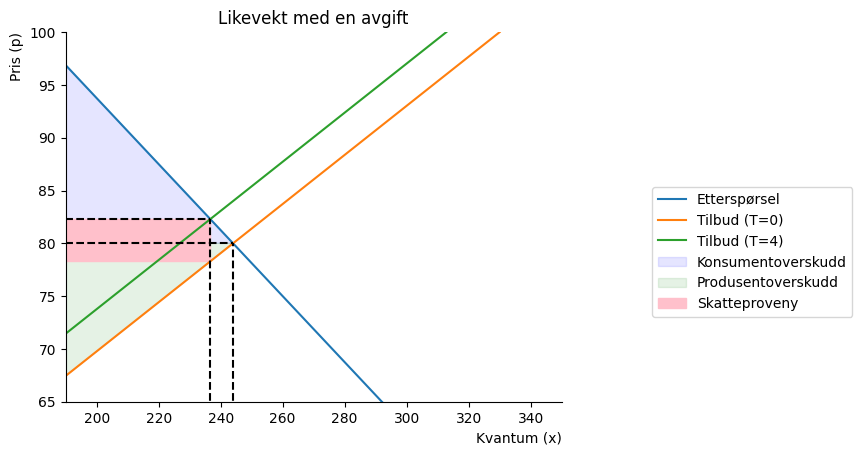

In [99]:
x_num=np.linspace(0.1,100,100)

def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris (p)', loc='top')
                ax.set_xlabel('Kvantum (x)', loc='right')
                ax.set(xlim=(190,350))
                ax.set(ylim=(65,100))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

fig, ax = create_ax()

ax.plot(x_d(x_num),x_num, label = 'Etterspørsel')
ax.plot(x_s(x_num,0),x_num, label = 'Tilbud (T=0)')
ax.plot(x_s(x_num,4),x_num,label = 'Tilbud (T=4)')

ax.vlines(x_eq,0,p_eq, color='black',ls='dashed')
ax.hlines(p_eq2,0,x_eq2, color='black',ls='dashed')
ax.vlines(x_eq2,0,p_eq2, color='black',ls='dashed')
ax.hlines(p_eq,0,x_eq, color = 'black', ls = 'dashed')

z=np.linspace(p_eq,x_eq2,100)
x=np.linspace(p_eq,0,100)
y=np.linspace(x_eq,0,10)

ax.fill_between(x_d(z),z,p_eq,color = "blue",alpha = 0.1,label='Konsumentoverskudd')
ax.fill_between(x_s(x,0),p_eq,x,color = "green",alpha = 0.1,label='Produsentoverskudd')
ax.fill_between(z,p_eq2-4,p_eq2, color = 'pink',label = 'Skatteproveny')
ax.set_title('Likevekt med en avgift')

ax.legend(bbox_to_anchor=(1.6,0.6))

In [96]:
from IPython.display import Markdown

tbl=f"""

|                     | før avgift      | etter avgift | endring  |
| :-------------------| :---------------|:-------------|:---------:|
| konsument pris:       |      ${p_eq}$          |  ${p_eq2}$ |  ${p_eq2-p_eq}$ |
| produsent pris:        |     ${p_eq}$    |     ${p_eq-4}$         |   ${(p_eq-4)-p_eq}$ |
| kvantum:              |     ${x_eq}$           |    ${x_eq2}$            |    ${x_eq2 - x_eq}$  |
| konsument overskudd: |        ${consumer_surplus}$         |  ${consumer_surplus2}$              |  ${consumer_surplus2-consumer_surplus}$ |
| produsent overskudd: |     ${producer_surplus}$    |   ${producer_surplus2}$             | ${producer_surplus2-producer_surplus}$      | 
| ko + po :              |               |               |         |
| skatteproveny: |                 |                |        |
| dødvektstap: |         |                |       | 
"""

display(Markdown(tbl))



|                     | før avgift      | etter avgift | endring  |
| :-------------------| :---------------|:-------------|:---------:|
| konsument pris:       |      $80$          |  $82.29333333333334$ |  $2.2933333333333366$ |
| produsent pris:        |     $80$    |     $76$         |   $-4$ |
| kvantum:              |     $244$           |    $236.6613333333333$            |    $-7.338666666666711$  |
| konsument overskudd: |        $7222.39999999999$         |  $9241.27796337780$              |  $2018.87796337780$ |
| produsent overskudd: |     $84082.4000000000$    |   $73206.1031367111$             | $-10876.2968632889$      | 
| ko + po :              |               |               |         |
| skatteproveny: |                 |                |        |
| dødvektstap: |         |                |       | 
